In [ ]:
#Julian David Gutiérrez Pérez

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Cargar el conjunto de datos como "arbol"
arbol = pd.read_csv('wine.data')

# Mostrar la forma y descripción del conjunto de datos
print("Forma del conjunto de datos:")
print(arbol.shape)
print("\nDescripción del conjunto de datos:")
print(arbol.describe())

Forma del conjunto de datos:
(177, 14)

Descripción del conjunto de datos:
                1       14.23        1.71        2.43        15.6         127  \
count  177.000000  177.000000  177.000000  177.000000  177.000000  177.000000   
mean     1.943503   12.993672    2.339887    2.366158   19.516949   99.587571   
std      0.773991    0.808808    1.119314    0.275080    3.336071   14.174018   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.360000    1.600000    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.870000    2.360000   19.500000   98.000000   
75%      3.000000   13.670000    3.100000    2.560000   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

              2.8        3.06         .28        2.29        5.64        1.04  \
count  177.000000  177.000000  177.000000  177.000000  177.000000  177.000000   
mean     2.292260    2.023446    

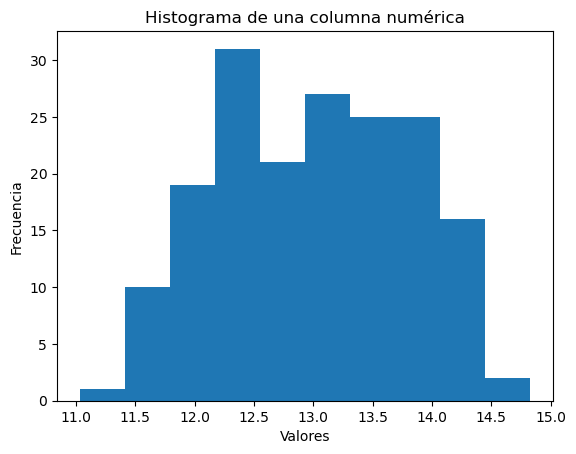

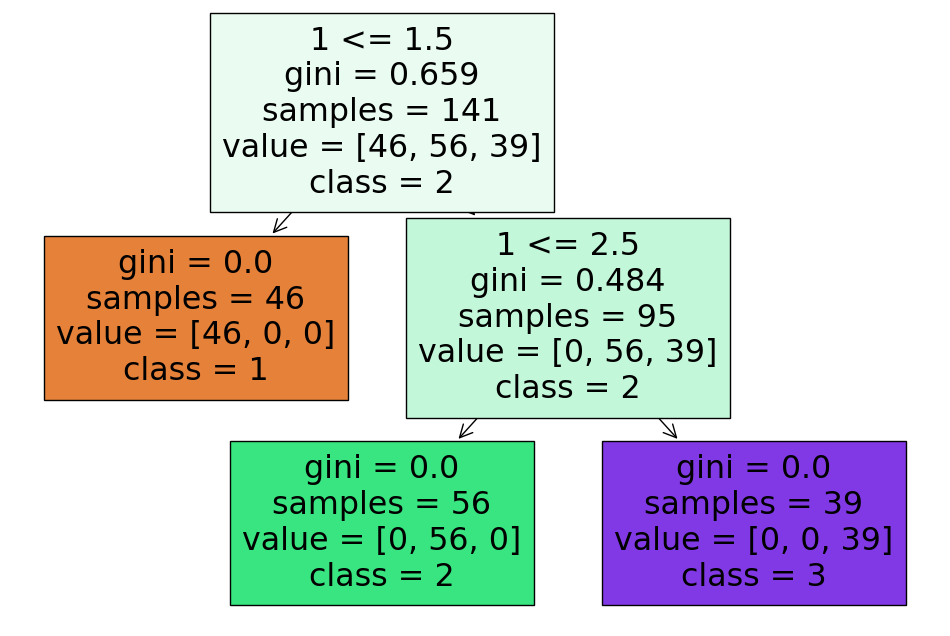


Matriz de Confusión:
Predicciones   1   2  3
Actual                 
1             12   0  0
2              0  15  0
3              0   0  9

Precisión del modelo: 1.0


In [3]:
plt.hist(arbol["14.23"])  
plt.xlabel("Valores")
plt.ylabel("Frecuencia")
plt.title("Histograma de una columna numérica")
plt.show()


predictors_col = ["1", "14.23", "1.71", "2.43", "15.6", "127", "2.8", "3.06", ".28", "2.29", "5.64", "1.04", "3.92", "1065"]
target_col = ['1']
predictors = arbol[predictors_col]
target = arbol[target_col]


X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

# Crear un árbol de decisión
tree = DecisionTreeClassifier()
modelo_arbol = tree.fit(X_train, y_train)


class_names = [str(c) for c in target['1'].unique()]

# Mostrar el árbol de decisión con las clases como nombres
plt.figure(figsize=(12, 8))
plot_tree(modelo_arbol, filled=True, feature_names=predictors_col, class_names=class_names)
plt.show()

# Realizar predicciones en el conjunto de prueba
predicciones = modelo_arbol.predict(X_test)

# Examinar la matriz de confusión
confusion_matrix = pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])
print("\nMatriz de Confusión:")
print(confusion_matrix)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, predicciones)
print("\nPrecisión del modelo:", accuracy)